<a href="https://colab.research.google.com/github/ChristoRay/ChrisPortofolioForDS/blob/main/Fifa%2019%20Project/%20EDA_on_Outfield_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mostly EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/content/df_outfield.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


In [6]:
#drop unecessary columns
df.drop(columns=['Unnamed: 0'],inplace = True)

In [7]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,16122.000000,16122.000000,16122.000000,1.612200e+04,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,1.612200e+04
mean,25.005272,66.461233,71.515631,2.522221e+06,10130.194765,1.115494,3.004590,2.532502,19.424203,180.388683,74.449192,59.836000,59.836000,59.836000,61.058181,60.739921,60.739921,60.739921,61.058181,61.003660,61.003660,61.003660,61.755241,60.241409,60.241409,60.241409,61.755241,59.533805,58.845677,58.845677,58.845677,59.533805,58.827317,57.635157,57.635157,57.635157,58.827317,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,4.379962e+06
std,4.547106,6.794631,6.074413,5.711658e+06,22582.379873,0.396542,0.636915,0.617823,15.595258,6.430065,6.716756,9.142763,9.142763,9.142763,9.891451,9.853478,9.853478,9.853478,9.891451,9.782895,9.782895,9.782895,9.264765,8.817549,8.817549,8.817549,9.264765,8.982024,10.093232,10.093232,10.093232,8.982024,9.538665,11.719739,11.719739,11.719739,9.538665,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,1.091852e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.00000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16122 non-null  object 
 1   Age                       16122 non-null  int64  
 2   Nationality               16122 non-null  object 
 3   Overall                   16122 non-null  int64  
 4   Potential                 16122 non-null  int64  
 5   Club                      16122 non-null  object 
 6   Value                     16122 non-null  float64
 7   Wage                      16122 non-null  float64
 8   Preferred Foot            16122 non-null  object 
 9   International Reputation  16122 non-null  float64
 10  Weak Foot                 16122 non-null  float64
 11  Skill Moves               16122 non-null  float64
 12  Position                  16122 non-null  object 
 13  Jersey Number             16122 non-null  float64
 14  Height

In [9]:
'''looking at these summaries, columns potential and value looks a bit weird, since
there are players that doesn't have value or wage. we'll look into these
'''
#players with value = 0
df[df['Wage']==0]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
399,L. Paredes,24,Argentina,80,85,No Club,0.0,0.0,Right,2.0,4.0,4.0,CM,5.0,180.34,74.84,73,73,73,77,77,77,77,77,79,79,79,78,81,81,81,78,77,79,79,79,77,76,74,74,74,76,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,0.0,Medium,Medium
476,A. Granqvist,33,Sweden,80,80,No Club,0.0,0.0,Right,2.0,4.0,2.0,LCB,4.0,193.04,83.91,64,64,64,58,60,60,60,58,60,60,60,59,66,66,66,59,70,76,76,76,70,72,81,81,81,72,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,0.0,High,Medium
601,I. Smolnikov,29,Russia,79,79,No Club,0.0,0.0,Right,2.0,3.0,3.0,RB,2.0,177.80,69.85,72,72,72,75,74,74,74,75,75,75,75,77,76,76,76,77,80,77,77,77,80,80,75,75,75,80,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,0.0,High,High
775,A. Dzyuba,29,Russia,78,78,No Club,0.0,0.0,Right,2.0,3.0,3.0,ST,22.0,195.58,91.17,79,79,79,73,76,76,76,73,73,73,73,73,68,68,68,73,54,54,54,54,54,50,50,50,50,50,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,0.0,High,Medium
849,Luís Neto,30,Portugal,77,77,No Club,0.0,0.0,Right,1.0,3.0,2.0,CB,4.0,187.96,71.21,54,54,54,53,53,53,53,53,56,56,56,56,63,63,63,56,69,74,74,74,69,71,77,77,77,71,42.0,33.0,80.0,72.0,40.0,49.0,52.0,43.0,77.0,48.0,57.0,59.0,69.0,78.0,61.0,42.0,79.0,72.0,72.0,37.0,76.0,78.0,44.0,46.0,47.0,72.0,80.0,77.0,78.0,0.0,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,M. Smith,18,Wales,56,75,No Club,0.0,0.0,Right,1.0,2.0,2.0,CDM,23.0,177.80,68.04,49,49,49,52,51,51,51,52,53,53,53,54,55,55,55,54,55,57,57,57,55,55,55,55,55,55,46.0,39.0,38.0,58.0,38.0,50.0,51.0,42.0,54.0,54.0,58.0,60.0,62.0,53.0,68.0,46.0,66.0,58.0,57.0,40.0,62.0,55.0,45.0,52.0,45.0,55.0,51.0,55.0,52.0,0.0,Medium,Medium
15101,J. Lalrinzuala,19,India,56,64,No Club,0.0,0.0,Left,1.0,2.0,2.0,LB,6.0,175.26,68.04,50,50,50,50,48,48,48,50,46,46,46,51,45,45,45,51,56,51,51,51,56,57,54,54,54,57,54.0,36.0,44.0,43.0,34.0,46.0,24.0,40.0,35.0,41.0,76.0,73.0,67.0,54.0,71.0,63.0,63.0,65.0,56.0,32.0,52.0,49.0,47.0,35.0,36.0,44.0,57.0,58.0,53.0,0.0,Medium,Medium
15157,A. Kuruniyan,21,India,56,70,No Club,0.0,0.0,Left,1.0,3.0,2.0,LW,13.0,175.26,69.85,57,57,57,58,57,57,57,58,55,55,55,57,49,49,49,57,44,38,38,38,44,42,34,34,34,42,53.0,47.0,58.0,56.0,39.0,49.0,37.0,48.0,31.0,54.0,76.0,78.0,81.0,54.0,76.0,57.0,52.0,65.0,49.0,49.0,33.0,20.0,58.0,48.0,37.0,41.0,17.0,15.0,12.0,0.0,High,Medium
15185,G. Kostadinov,27,Bulgaria,56,57,No Club,0.0,0.0,Right,1.0,3.0,2.0,LDM,7.0,182.88,73.94,49,49,49,49,49,49,49,49,51,51,51,51,53,53,53,51,55,57,57,57,55,56,57,57,57,56,43.0,36.0,48.0,67.0,28.0,48.0,36.0,35.0,65.0,45.0,57.0,64.0,52.0,52.0,60.0,63.0,55.0,46.0,55.0,32.0,52.0,45.0,34.0,45.0,42.0,45.0,58.0,58.0,67.0,0.0,Medium,High


In [10]:
#looks like, players that doesn't have a club, are not paid, let's see if this is the case here
df[df['Club']=='No Club'][['Value','Wage']].describe()

,Value,Wage
count,196.0,196.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [11]:
#since players with no club doesn't have value and wage, we'll drop these rows
df.drop(df.loc[df['Club']=='No Club'].index,inplace = True)
df.drop(df.loc[df['Value']==0].index,inplace = True)
df.reset_index(drop=True, inplace=True)
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,15918.000000,15918.000000,15918.000000,1.591800e+04,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,15918.000000,1.591800e+04
mean,24.983603,66.446539,71.523935,2.554545e+06,10257.884156,1.115781,3.004083,2.533358,19.522553,180.387392,74.444555,59.845521,59.845521,59.845521,61.070549,60.753612,60.753612,60.753612,61.070549,61.017465,61.017465,61.017465,61.764229,60.245068,60.245068,60.245068,61.764229,59.518532,58.830318,58.830318,58.830318,59.518532,58.807576,57.611823,57.611823,57.611823,58.807576,54.188466,49.783578,57.039138,62.644742,46.754492,60.617477,51.282133,46.436299,56.088642,63.222892,67.913431,67.996231,66.446413,62.189157,66.584056,59.612514,66.049190,67.318696,65.911547,51.446790,59.572497,50.397223,54.849227,55.492650,52.115907,60.342882,51.268061,51.879005,49.590652,4.436094e+06
std,4.541327,6.809011,6.081923,5.740956e+06,22697.749026,0.397392,0.637005,0.618239,15.653781,6.429679,6.722722,9.140005,9.140005,9.140005,9.886520,9.846850,9.846850,9.846850,9.886520,9.776503,9.776503,9.776503,9.262013,8.820183,8.820183,8.820183,9.262013,8.991350,10.101945,10.101945,10.101945,8.991350,9.545800,11.722398,11.722398,11.722398,9.545800,14.129959,16.360958,11.611999,9.778864,14.772758,12.502268,15.134658,15.071968,12.382087,9.994216,11.745636,11.465044,12.346095,8.776326,12.182357,13.213163,11.541628,11.183321,12.600625,15.715381,14.430470,18.799664,14.662011,12.894609,12.498331,10.141434,17.199529,19.164464,19.165211,1.097693e+07
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,2.000000,2.000000,154.940000,49.900000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,26.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1.000000,3.000000,2.000000,9.000000,175.260000,69.850000,54.000000,54.000000,54.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000,54.000000,54.000000,54.000000,56.000000,53.000000,51.000000,51.000000,51.000000,53.000000,52.000000,48.000000,48.000000,48.000000,52.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.000

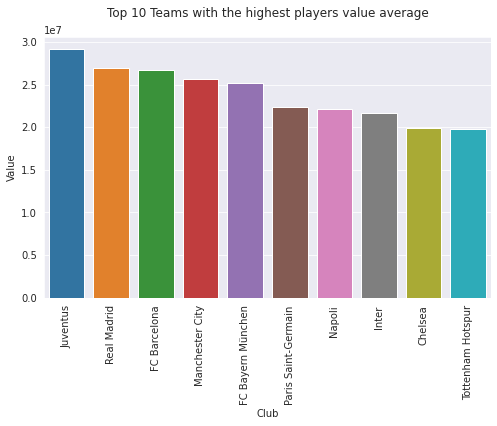

In [12]:
#Which team has the highest average player value ?

average_value_sort = df.groupby('Club').mean()['Value'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[:10])
plt.title('Top 10 Teams with the highest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

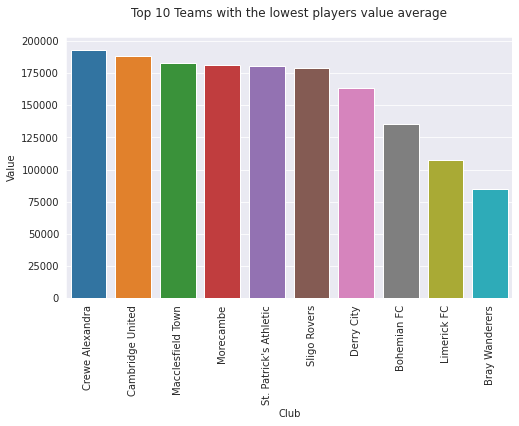

In [13]:
#How about the lowest 10 teams by average player values? 
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Value',data = average_value_sort[-10:])
plt.title('Top 10 Teams with the lowest players value average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [14]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium


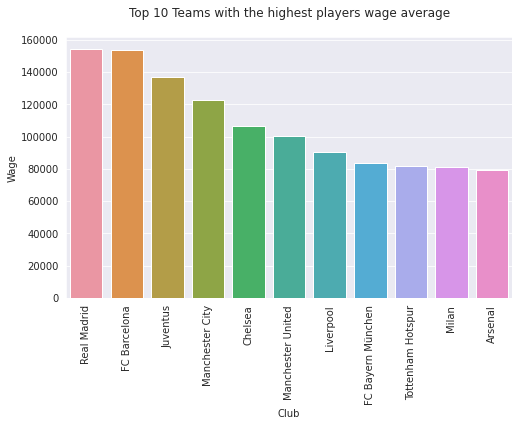

In [15]:
#Which team has the highest average player wage ?

average_wage_sort = df.groupby('Club').mean()['Wage'].sort_values(ascending=False).reset_index().copy()

plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[:11])
plt.title('Top 10 Teams with the highest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [16]:
average_wage_sort.head()

,Club,Wage
0,Real Madrid,154068.965517
1,FC Barcelona,153379.310345
2,Juventus,137181.818182
3,Manchester City,122655.172414
4,Chelsea,106758.620690


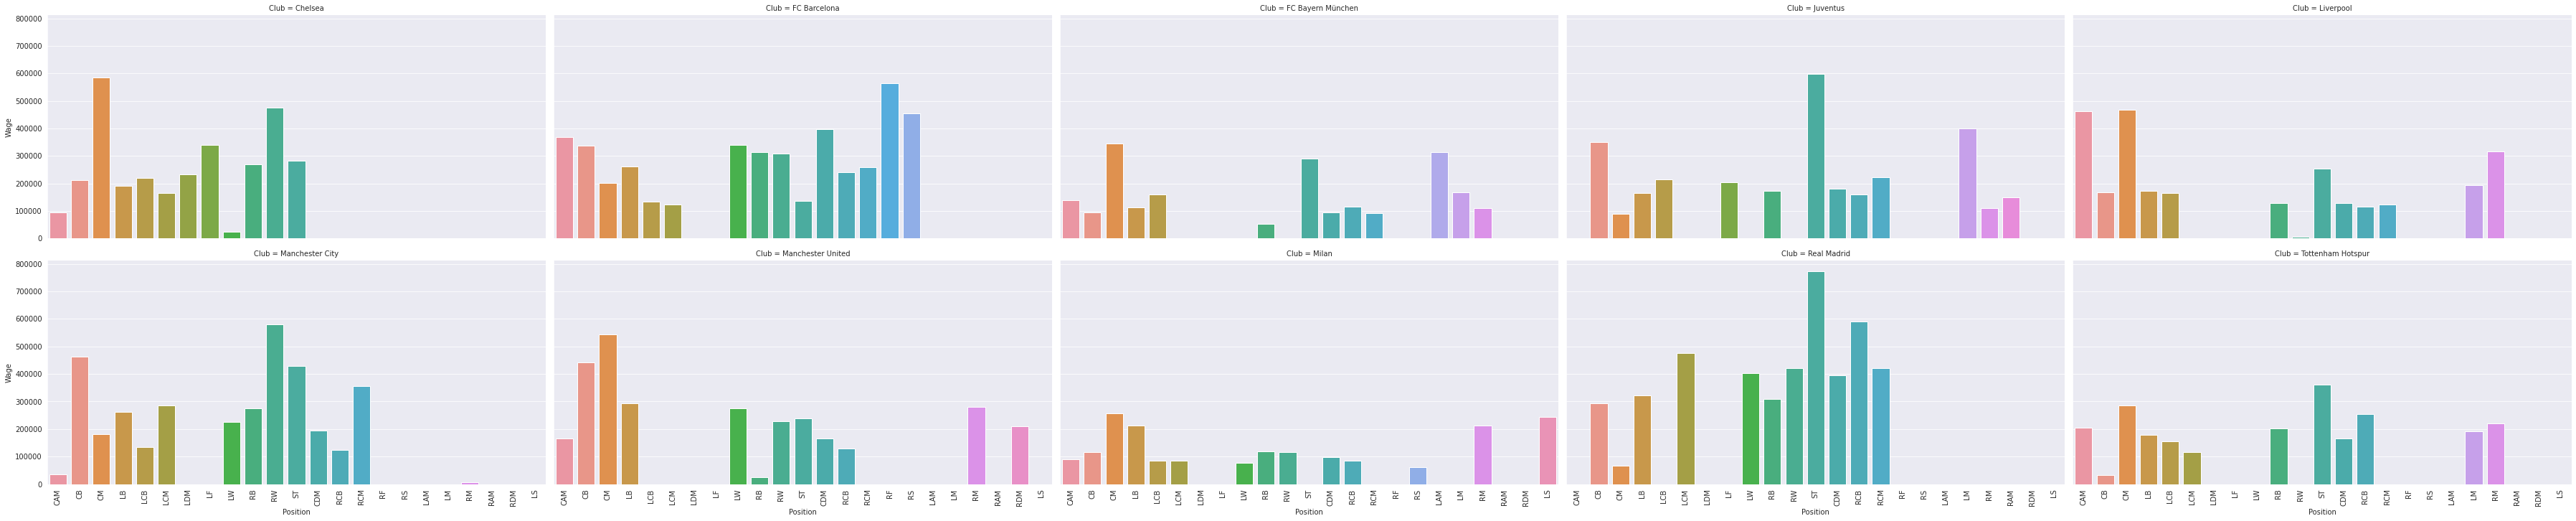

In [17]:
#after knowing which are the top 10 clubs, let's see which position do they spend the most
clubs = average_wage_sort[:10]['Club'].values

top_10_wage = df[df['Club'].isin(clubs)]
top_10_wage = top_10_wage.groupby(['Club','Position']).agg({'Wage':'sum'}).reset_index().copy()
top_10_wage

g = sns.catplot(x='Position',y='Wage',
                col='Club',data=top_10_wage,
                kind='bar',col_wrap = 5,aspect = 2)

g.set_xticklabels(rotation=90)
plt.show()

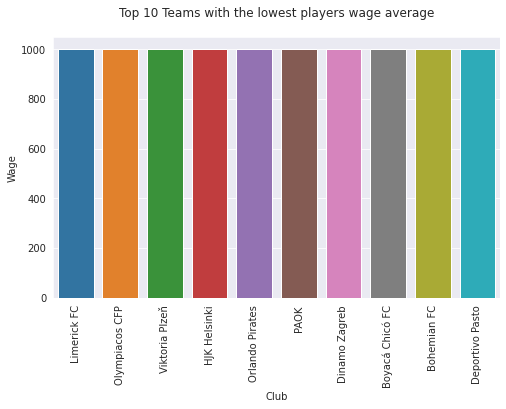

In [18]:
#How about clubs with lowest average player wage ?
plt.figure(figsize=(8,4.8))
sns.set_style(style='darkgrid')
sns.barplot(x='Club',y='Wage',data = average_wage_sort[-10:])
plt.title('Top 10 Teams with the lowest players wage average',pad=20)
plt.xticks(rotation=90)
plt.show()

In [19]:
# well this is a bit weird, let's check how many clubs that have the same lowest average wage
average_wage_sort[average_wage_sort['Wage']<=1000].shape

(32, 2)

In [20]:
'''
looking at the graph above, we'll look into why all of 32 clubs have the same average
wage for players
'''

clubs = average_wage_sort['Club'][-32:].values
clubs_lowest_average = df[df['Club'].isin(clubs)].reset_index().copy()
clubs_lowest_average.groupby('Club').agg({'index':'count','Wage':['sum','count','mean']})

#from this output, we can see that these clubs pays all of their players the same amount

index     Wage              
                       count      sum count    mean
Club                                               
AEK Athens                25  25000.0    25  1000.0
Bohemian FC               22  22000.0    22  1000.0
Boyacá Chicó FC           23  23000.0    23  1000.0
Bray Wanderers            20  20000.0    20  1000.0
Cork City                 23  23000.0    23  1000.0
Deportivo Pasto           26  26000.0    26  1000.0
Dinamo Zagreb             25  25000.0    25  1000.0
Dynamo Kyiv               25  25000.0    25  1000.0
Envigado FC               26  26000.0    26  1000.0
FC Energie Cottbus        26  26000.0    26  1000.0
HJK Helsinki              22  22000.0    22  1000.0
IF Brommapojkarna         24  24000.0    24  1000.0
IK Sirius                 24  24000.0    24  1000.0
Itagüí Leones FC          22  22000.0    22  1000.0
Jaguares de Córdoba       23  23000.0    23  1000.0
Kaizer Chiefs             25  25000.0    25  1000.0
Limerick FC               17  17000.0    17  1000.0
Lokomotiv Moscow          25  25000.0    25  1000.0
Olympiacos CFP            25  25000.0    25  1000.0
Orlando Pirates           24  24000.0    24  1000.0
PAOK                      23  23000.0    23  1000.0
PFC CSKA Moscow           25  25000.0    25  1000.0
Panathinaikos FC          25  25000.0    25  1000.0
SK Slavia Praha           25  25000.0    25  1000.0
Shakhtar Donetsk          25  25000.0    25  1000.0
Shamrock Rovers           20  20000.0    20  1000.0
Sligo Rovers              17  17000.0    17  1000.0
Sparta Praha              25  25000.0    25  1000.0
Spartak Moscow            24  24000.0    24  1000.0
St. Patrick's Athletic    20  20000.0    20  1000.0
Trelleborgs FF            25  25000.0    25  1000.0
Viktoria Plzeň            21  21000.0    21  1000.0

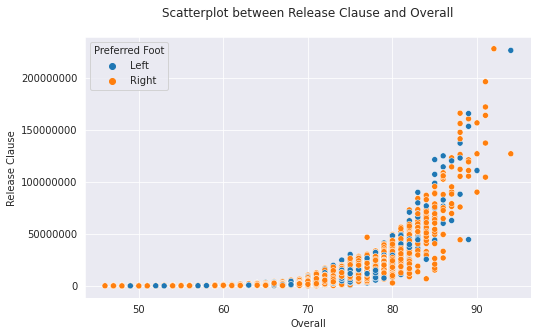

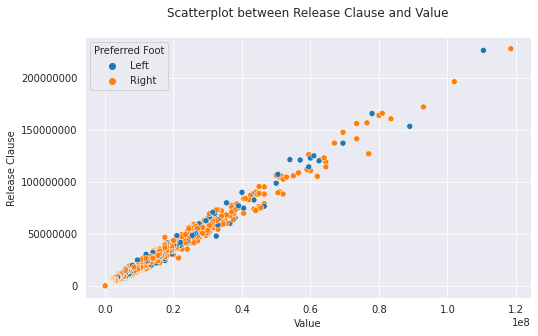

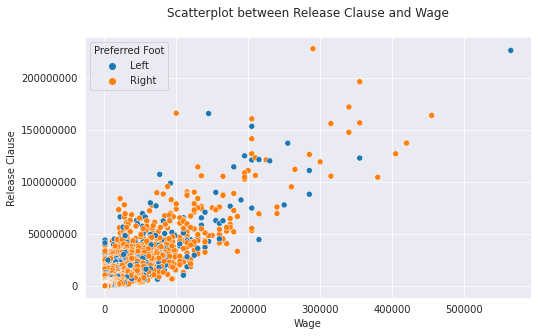

In [21]:
#Now we'll see how Release Clause correlates with Overall, Value and Wage
'''
during the data preprocessing, i substitute players with no Release Clause to 0,
so we'll need to subset the 0 out of it
'''
Release_Clause = df[df['Release Clause']!=0].copy()
cols = ['Overall','Value','Wage']

for i in cols : 
  plt.figure(figsize=(8,4.8))
  sns.set_style(style='darkgrid')
  sns.scatterplot(x=i,y='Release Clause',data = Release_Clause,
                  hue='Preferred Foot')
  
  title = 'Scatterplot between Release Clause and ' + i
  plt.title(title,pad=20)
  plt.xticks()
  plt.ticklabel_format(style='plain',axis = 'y')
  plt.show()

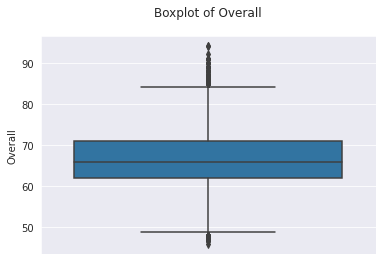

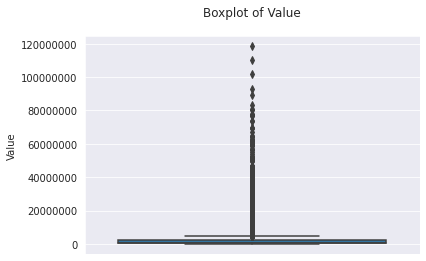

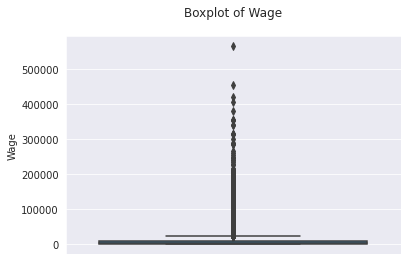

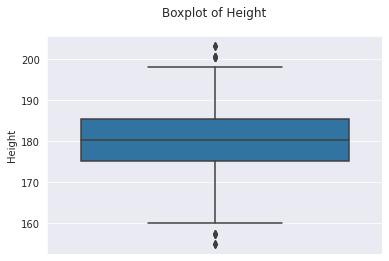

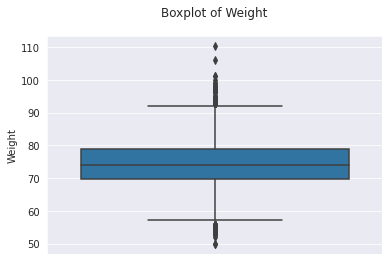

In [22]:
#let's see the distribution of overall, value and wage

cols = ['Overall','Value','Wage','Height', 'Weight']

for i in cols:
  sns.boxplot(y=i,data=df)
  title = 'Boxplot of ' + i
  plt.title(title,pad=20)
  plt.xticks()
  plt.ticklabel_format(style='plain',axis = 'y')
  plt.show()

In [23]:
#there are definetly more right footed players than there are left
df['Preferred Foot'].value_counts()

Right    11964
Left      3954
Name: Preferred Foot, dtype: int64

In [24]:
#Let's see which position tends to be paid the most, for that we're going to do some groupby and aggregation.
groupby_position = df.groupby(['Position']).agg({'Wage':['count','mean','median','sum','min','max']})

# reseting the index (position) to columns
groupby_position = groupby_position.reset_index() 

# since the columns become a multiindex/hierachical index, we're going to change that to single index columns
groupby_position.columns = ["_".join(a) for a in groupby_position.columns.to_flat_index()] 

#.to_flat_index() only applies to MultiIndex, this change it to a tuple
#remember the string join() method, a is an iterable that is put in list comprehension, thus we have this
groupby_position.head()

,Position_,Wage_count,Wage_mean,Wage_median,Wage_sum,Wage_min,Wage_max
0,CAM,946,10349.894292,3000.0,9791000.0,1000.0,205000.0
1,CB,1751,7812.107367,3000.0,13679000.0,1000.0,205000.0
2,CDM,936,9434.829060,3000.0,8831000.0,1000.0,315000.0
3,CF,74,10216.216216,3000.0,756000.0,1000.0,71000.0
4,CM,1377,8443.718228,2000.0,11627000.0,1000.0,175000.0


In [25]:
groupby_position.head()

,Position_,Wage_count,Wage_mean,Wage_median,Wage_sum,Wage_min,Wage_max
0,CAM,946,10349.894292,3000.0,9791000.0,1000.0,205000.0
1,CB,1751,7812.107367,3000.0,13679000.0,1000.0,205000.0
2,CDM,936,9434.829060,3000.0,8831000.0,1000.0,315000.0
3,CF,74,10216.216216,3000.0,756000.0,1000.0,71000.0
4,CM,1377,8443.718228,2000.0,11627000.0,1000.0,175000.0


In [26]:
groupby_position.loc[:,groupby_position.columns!='Position_'].columns

Index(['Wage_count', 'Wage_mean', 'Wage_median', 'Wage_sum', 'Wage_min',
       'Wage_max'],
      dtype='object')

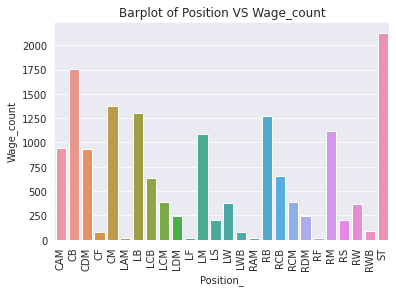

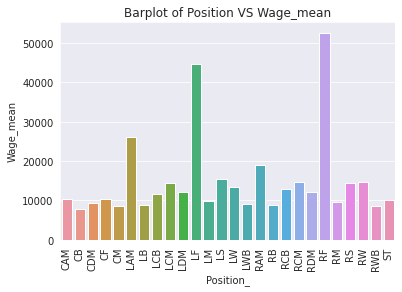

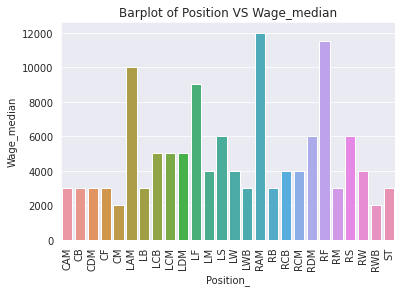

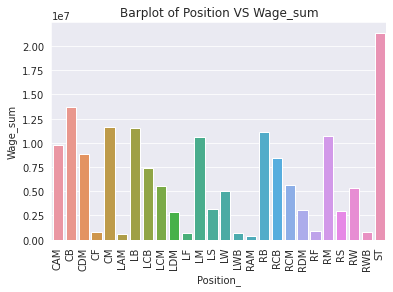

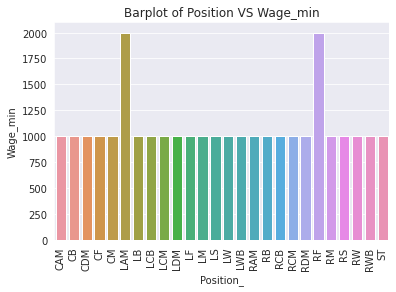

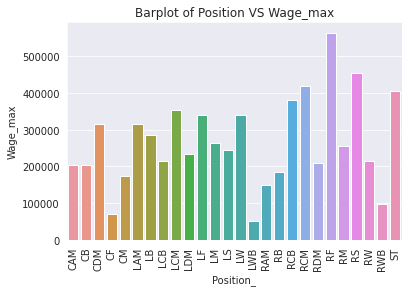

In [27]:
#let's visualize these values
columns =  groupby_position.loc[:,groupby_position.columns!='Position_'].columns
for cols in columns :
  sns.set_style(style='darkgrid')
  sns.barplot(x='Position_',y=cols,data = groupby_position)
  header = 'Barplot of Position VS ' + cols
  plt.title(header)
  plt.xticks(rotation=90)
  plt.show()

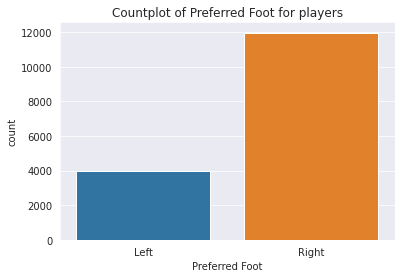

In [28]:
#count plot of preffered foot 
sns.countplot(x='Preferred Foot',data = df)
plt.title('Countplot of Preferred Foot for players')
plt.show()

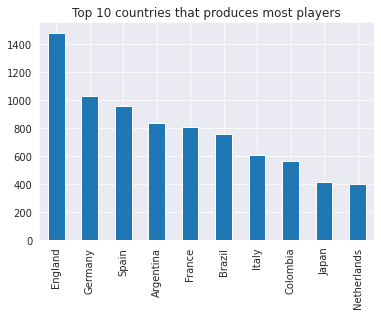

In [29]:
#Which country produces most professional football players
df['Nationality'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 countries that produces most players')
plt.show()

In [30]:
#best player in each position
df.groupby('Position')

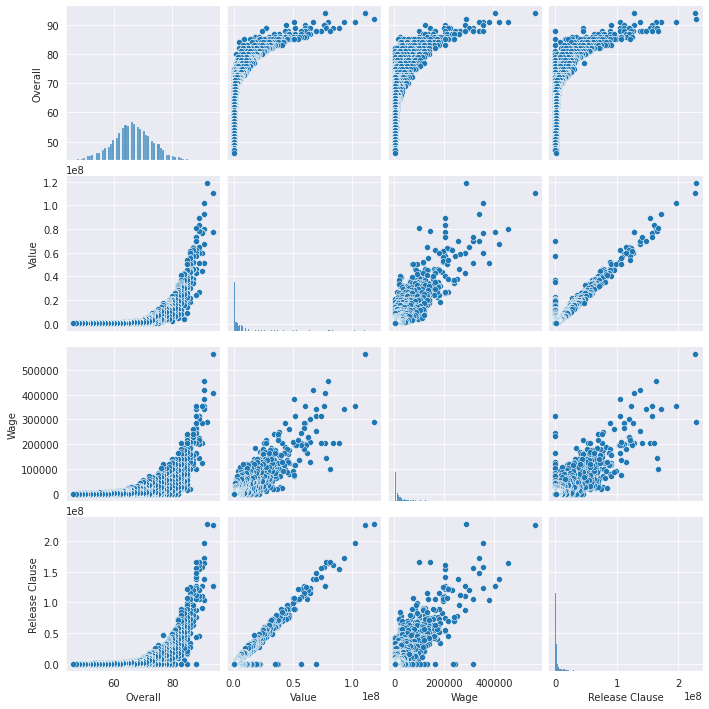

In [31]:
#pair plot of certain variables
cols = ['Overall','Value','Wage','Release Clause']
sns.pairplot(df[cols])
plt.show()

## Playing around with Linear Models

### Firts Iteration

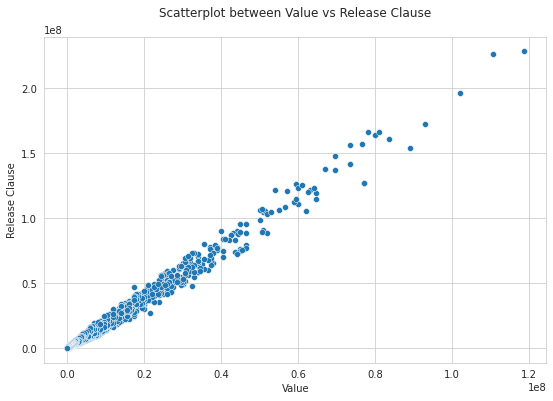

In [32]:
'''
First ML model i've ever made right here, Linear Regression 
since Value vs Release clause seems to have a linear relationship, let's see the coefficinet regression
'''
#first, scatterlpot of them
plt.figure(figsize=[9,6])
sns.set_style('whitegrid')
sns.scatterplot(x='Value',y='Release Clause',data = df[df['Release Clause']!=0])
plt.title('Scatterplot between Value vs Release Clause', pad =20)
plt.show()

In [48]:
#import libraries we might need
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

In [34]:
#let's spit the data
reg_data = df[df['Release Clause']!=0][['Release Clause','Value']].reset_index().copy()
x = np.array(reg_data.loc[:,'Value']).reshape(-1,1)
y = np.array(reg_data.loc[:,'Release Clause']).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [35]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('Regression coefficient : {}'.format(lr.coef_))
print('Regression intercept : {}'.format(lr.intercept_))

Regression coefficient : [[1.92889716]]
Regression intercept : [-138505.43679229]


In [50]:
print('R2 on training set {}'.format(lr.score(x_train,y_train)))
print('R2 on test set {}'.format(lr.score(x_test,y_test)))
print('R2 on test set {}'.format(r2_score(y_test,y_pred)))

R2 on training set 0.9880019289742948
R2 on test set 0.9899100485561193
R2 on test set 0.9899100485561193


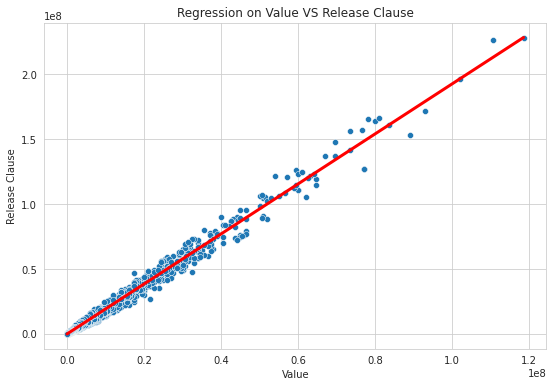

In [47]:
#Visualize the prediction to the original data
m = np.linspace(reg_data['Value'].min(),reg_data['Value'].max(), num= 1000)
n = lr.predict(m.reshape(-1,1))

plt.figure(figsize = [9,6])
sns.scatterplot(x='Value',y='Release Clause',data = reg_data)
plt.plot(m,n, color='r', linewidth=3)
plt.title('Regression on Value VS Release Clause')
plt.show()

### Second Iteration

In [51]:
'''
in this iteration, we'll implement Cross Validation for the linear model, and check whether the data that
we'll use follows the basic assumptions of linear regression models
'''
from sklearn.model_selection import cross_val_score

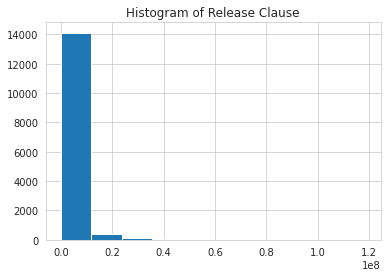

In [61]:
#let's see the distribution of Release Clause, does it follows normal dist ?
plt.hist(x,bins=10)
plt.title('Histogram of Release Clause')
plt.show()

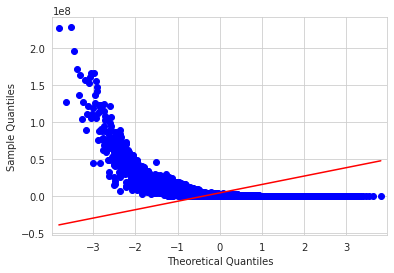

In [62]:
#from histogram looks like it is really right skewed, how about qq plot ?
from statsmodels.graphics.gofplots import qqplot
qqplot(y, line = 's')
plt.show()

In [64]:
#just to make sure let's do anderson-darling and shapiro-wilk test
from scipy.stats import shapiro
stat,p = shapiro(y)
alpha = 0.05

if p < alpha :
  print('Reject H0, distribution is not normal')
else : 
  print('Fail to reject H0, distribution is normal')

Reject H0, distribution is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [66]:
from scipy.stats import anderson
# normality test
result = anderson(y.reshape(-1,1))
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

TypeError: ignored

In [53]:
lr = LinearRegression()
scores = cross_val_score(lr, x, y)
print('Mean model performances are {} and {}'.format(scores.mean(),scores.std() ))
print('Scores are : {}'.format(scores))

Mean model performances are 0.734686989861739 and 0.2806158864172903
Scores are : [0.98234913 0.90375838 0.83927174 0.75418884 0.19386686]


In [38]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Position', 'Jersey Number', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause', 'Attacking Work Rate', 'Defensive Work Rate'],
      dtype='object')

In [39]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Attacking Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,10.0,170.18,72.12,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,7.0,187.96,83.01,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,10.0,175.26,68.04,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,High,Medium
3,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,7.0,180.34,69.85,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,High,High
4,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,LF,10.0,172.72,73.94,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,High,Medium
